In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import time

from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from keras.preprocessing import image

from numpy import dot
from numpy.linalg import norm

from sklearn.decomposition import PCA


from keras.applications import vgg16
from keras.applications.imagenet_utils import decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

C:\Users\bldr1\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def getFiles(PATH, ext = '.npy'):
    _files = []
    for root, dirs, files in os.walk(PATH):
        for fichero in files:
            name, extension = os.path.splitext(fichero)
            if extension == ext:
                _files.append(os.path.join(PATH,fichero))
    return _files

In [3]:
def cosine_sim(a,b):
    cos_sim = dot(a,b)/(norm(a)*norm(b))
    return 1-cos_sim

In [4]:
def euclidean(a,b):
    eu = np.sqrt(np.sum(np.square(a-b)))
    return eu

In [5]:
ficheros = getFiles('.//images', ext='.jpeg')

### VGG16

In [6]:
vgg_model = vgg16.VGG16(weights='imagenet', include_top=True)
vgg_model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('fc1').output)

In [7]:
N_SAVE = 53
descriptors = []

i=1
for fichero in tqdm(ficheros):
    img = image.load_img(fichero, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    descriptor = vgg_model.predict(x)
    descriptors.append(descriptor)
        
    if i%N_SAVE == 0:
        descriptors = np.asarray(descriptors)
        np.save('poc_descriptors//vgg_{}'.format(int(i/N_SAVE)), descriptors)
        descriptors = []
        #time.sleep(60)
        
    
    i = i+1
    
descriptors = np.asarray(descriptors)
np.save('poc_descriptors//vgg_end', descriptors)

100%|██████████| 38/38 [00:37<00:00,  1.01it/s]


In [8]:
descriptors = getFiles('.//poc_descriptors')

In [9]:
numpy_descriptors = []
for descriptor in descriptors:
    a = np.load(descriptor)
    for x in a:
        numpy_descriptors.append(x[0])
numpy_descriptors = np.asarray(numpy_descriptors)

In [10]:
numpy_descriptors[0].shape

(4096,)

In [11]:
pca = PCA(n_components=100)
pca.fit(numpy_descriptors)
numpy_descriptors_pca = pca.transform(numpy_descriptors)

In [12]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute',metric='cosine').fit(numpy_descriptors_pca)

In [38]:
distances

array([[1.11022302e-16, 2.84874755e-01, 2.87262980e-01, 2.87676858e-01,
        3.67574754e-01]])

In [39]:
candidates

array([[15, 25, 26, 19, 27]], dtype=int64)

In [68]:
distances, candidates = nbrs.kneighbors(numpy_descriptors_pca[10])

C:\Users\bldr1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


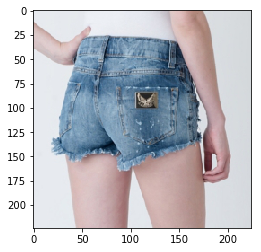

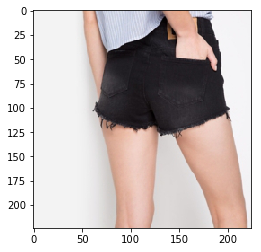

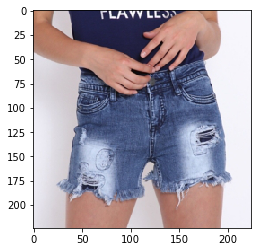

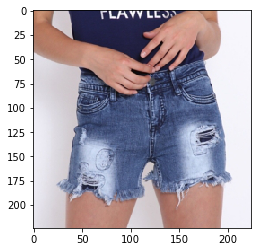

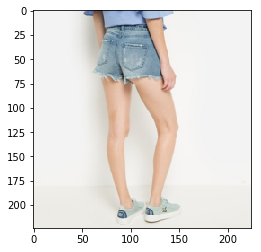

In [69]:
for candidate in candidates[0]:
    file = ficheros[candidate]
    img = image.load_img(file, target_size=(224, 224))
    plt.imshow(img)
    plt.show()

### ZAPATO BASTI

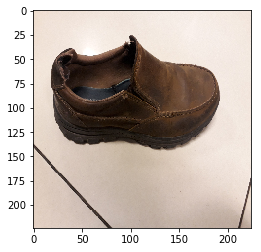

In [57]:
img = image.load_img('C:\\Users\\bldr1\\Downloads\\zapato.jpg', target_size=(224, 224))

plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

descriptor_zapato = vgg_model.predict(x)
descriptor_zapato = pca.transform(descriptor_zapato)

In [58]:
distances_zapato, candidates_zapato = nbrs.kneighbors(descriptor_zapato)

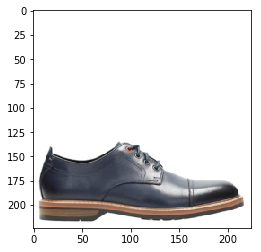

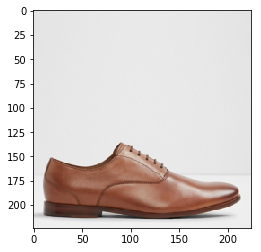

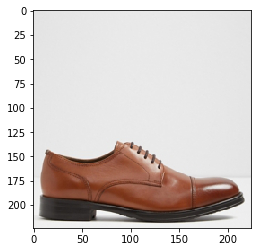

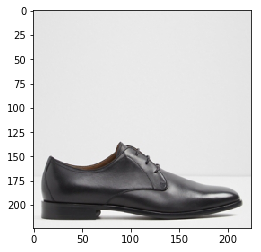

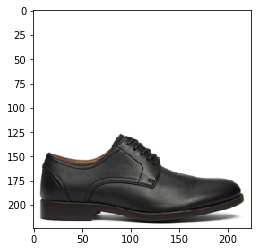

In [59]:
for candidate in candidates_zapato[0]:
    file = ficheros[candidate]
    img = image.load_img(file, target_size=(224, 224))
    plt.imshow(img)
    plt.show()